# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

Saving drilling_rigs.csv to drilling_rigs (20).csv
623


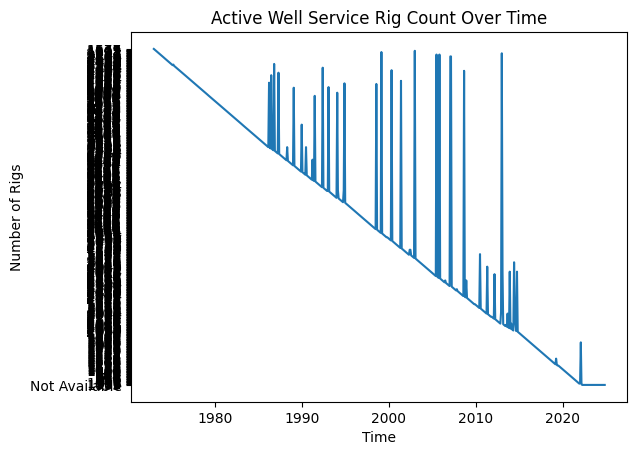

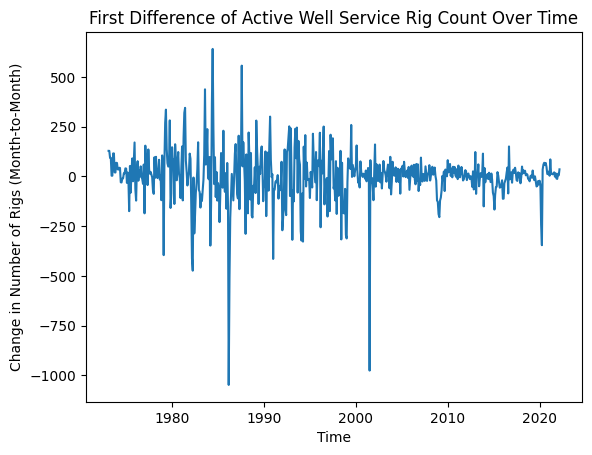

/tmp/ipython-input-1951194448.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


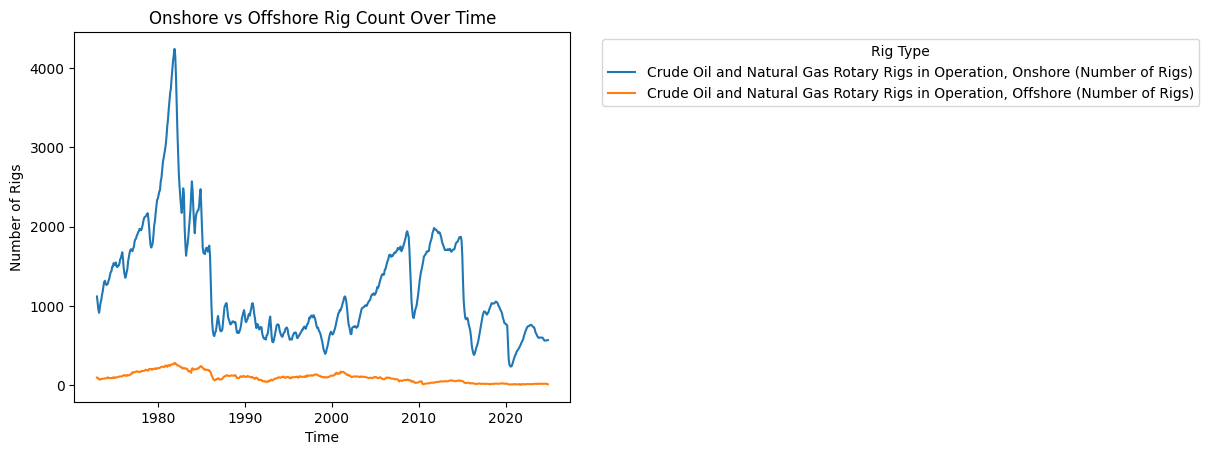

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('drilling_rigs.csv')
df.head()
#Question 1
print(df.shape[0]) #will give row number print(df. shape [1]) #will give column number
#How many observations? 623
#How many variables? 10
# Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
  # Variables will have to be typcast/coerced because there are numbers and string "Not available" values mixed together. We will have to replace the "Not Available" values with n
#Question 2
df['time'] = pd. to_datetime(df['Month'],format='mixed')
df.head( )
#Question 3
fig = sns.lineplot (data=df, x='time',
  y='Active Well Service Rig Count (Number of Rigs)')
fig.set(title="Active Well Service Rig Count Over Time",
        xlabel= 'Time', ylabel='Number of Rigs')
plt.show()
#Describe what I see; Theree's a very poorly made graph that doesn't show trends well at all. Design-wise, the graph is extremely messy.
#Question 4
df['Active Well Service Rig Count (Number of Rigs)'] = pd. to_numeric(df['Active Well Service Rig Count (Number of Rigs)'], errors='coerce')
df['rig_count_diff'] = df['Active Well Service Rig Count (Number of Rigs)'].diff()
fig = sns.lineplot(data=df, x='time', y= 'rig_count_diff')
fig.set(title="First Difference of Active Well Service Rig Count Over Time",
        xlabel='Time', ylabel='Change in Number of Rigs (Month-to-Month)')
plt.show()
#Describe what I see;The graph seems to be a little bit neater, but the trend is still unclear. It seems like the data is all bunched together.
#Question 5
df['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)'] = pd.to_numeric(df['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)'], errors='coerce')
df['Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'] = pd.to_numeric(df['Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'], errors='coerce')
melted_df = pd.melt(df,
                id_vars=['time'],
                value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
                              'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'],
                var_name='rig_type',
                value_name='rig_count')
fig = sns.lineplot (data=melted_df, x='time', y ='rig_count', hue ='rig_type')
fig.set(title= "Onshore vs Offshore Rig Count Over Time", xlabel='Time', ylabel='Number of Rigs')
plt.legend (title='Rig Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
#Describe what I see; This graph is nice! I can clearly see the data, the trends, and the difference between onshore and offshore.